In [3]:

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os


In [9]:
data = pd.read_csv('dataset/2024_2020_merged_2GB_cleaned.csv')
data.head()

,Title,Link,Published,Content,Pillar,Section,Type
0,Possessed Arteta coaxes Nicolas Pépé back from...,https://www.theguardian.com/football/blog/2020...,2020-01-01T22:56:44Z,"Welcome to the Emirates, Nicolas Pépé. We’ve b...",Sport,football,article
1,Hazy spirit gives way to smoke haze as cricket...,https://www.theguardian.com/sport/2020/jan/02/...,2020-01-01T22:50:39Z,The Trans-Tasman Trophy moves to Sydney this w...,Sport,sport,article
2,Dracula review – a blood-sucking delight that ...,https://www.theguardian.com/tv-and-radio/2020/...,2020-01-01T22:30:16Z,Do you want to have some FUN this Christmastid...,Arts,tv-and-radio,article
3,Arsenal 2-0 Manchester United: Premier League ...,https://www.theguardian.com/football/live/2020...,2020-01-01T22:12:52Z,Thank you very much for joining me for an enjo...,Sport,football,liveblog
4,Pépé strikes as Arsenal rediscover their mojo ...,https://www.theguardian.com/football/2020/jan/...,2020-01-01T22:06:10Z,Mikel Arteta has his first win as the Arsenal ...,Sport,football,article


In [10]:
t = data['Title'].values.tolist()
s = data['Section'].values.tolist()
ss = set(s)
print(len(ss))
print(ss)

43
{'wellness', 'lifeandstyle', 'books', 'fashion', 'technology', 'travel', 'commentisfree', 'culture', 'weather', 'news', 'theobserver', 'business', 'football', 'info', 'world', 'music', 'crosswords', 'stage', 'sport', 'law', 'australia-news', 'help', 'games', 'cardiff', 'tv-and-radio', 'uk-news', 'cities', 'food', 'membership', 'inequality', 'film', 'education', 'money', 'community', 'media', 'artanddesign', 'society', 'theguardian', 'politics', 'global-development', 'environment', 'us-news', 'science'}


In [ ]:
df = pd.read_csv("dataset/2024_2020_merged_2GB_cleaned.csv")

df['Section'] = df['Section'].str.strip().str.lower()

df = df.dropna(subset=['Section'])
df = df[df['Section'] != ""]
df_cleaned = df[['Title', 'Section']]

unique_sections = df_cleaned['Section'].nunique()
print(f"Unique Sections in Pandas: {unique_sections}")
print("Unique Sections:", df_cleaned['Section'].unique())

df_cleaned.to_csv("dataset/cleaned_data.csv", index=False)


Unique Sections in Pandas: 43
Unique Sections: ['football' 'sport' 'tv-and-radio' 'politics' 'news' 'uk-news' 'world'
 'australia-news' 'environment' 'science' 'commentisfree' 'media'
 'lifeandstyle' 'education' 'books' 'society' 'business' 'stage' 'us-news'
 'money' 'technology' 'culture' 'music' 'film' 'cities'
 'global-development' 'travel' 'fashion' 'food' 'artanddesign' 'law'
 'membership' 'crosswords' 'community' 'games' 'theobserver' 'theguardian'
 'weather' 'inequality' 'help' 'info' 'cardiff' 'wellness']


In [4]:
df = pd.read_csv("dataset/cleaned_data.csv")

section_counts = df['Section'].value_counts()
print("Section counts:\n", section_counts)

Section counts:
 Section
world                 45650
football              28189
commentisfree         25021
australia-news        24870
sport                 24702
us-news               23516
business              18600
uk-news               17089
politics              15387
environment           13848
lifeandstyle          13315
film                  12145
music                 11741
books                 11185
society               11135
tv-and-radio          10592
stage                  6539
food                   5289
artanddesign           5075
culture                4976
technology             4872
education              4264
money                  4184
global-development     4148
media                  4116
science                3441
news                   3198
travel                 3051
fashion                2696
games                  1280
law                    1110
crosswords              672
theobserver             369
wellness                182
inequality             

In [7]:
threshold = 1000

filtered_df = df.groupby('Section').filter(lambda x: len(x) >= threshold)
section_counts = filtered_df['Section'].value_counts()
print("Section counts:\n", section_counts)

filtered_df.to_csv("dataset/filtered_data.csv", index=False)

Section counts:
 Section
world                 45650
football              28189
commentisfree         25021
australia-news        24870
sport                 24702
us-news               23516
business              18600
uk-news               17089
politics              15387
environment           13848
lifeandstyle          13315
film                  12145
music                 11741
books                 11185
society               11135
tv-and-radio          10592
stage                  6539
food                   5289
artanddesign           5075
culture                4976
technology             4872
education              4264
money                  4184
global-development     4148
media                  4116
science                3441
news                   3198
travel                 3051
fashion                2696
games                  1280
law                    1110
Name: count, dtype: int64


98


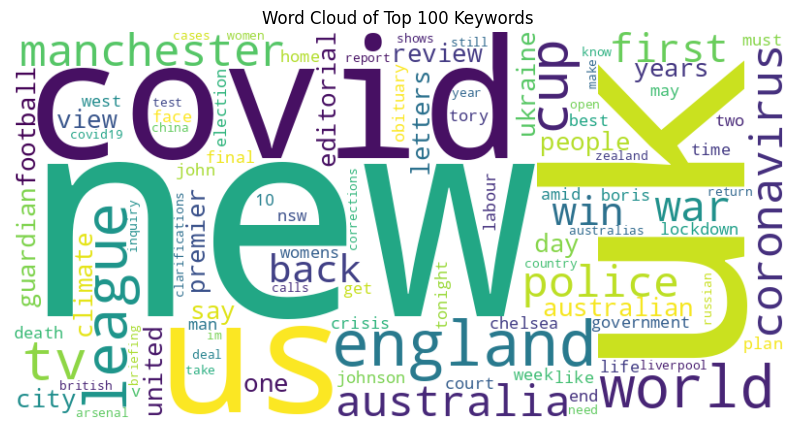

In [ ]:
# We remove the "happened" and "says" words from the json file 
# to obtain a better word cloud
with open('top_100_keywords.json', 'r') as json_file:
    word_freq = json.load(json_file)
print(len(word_freq))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 100 Keywords')
plt.show()

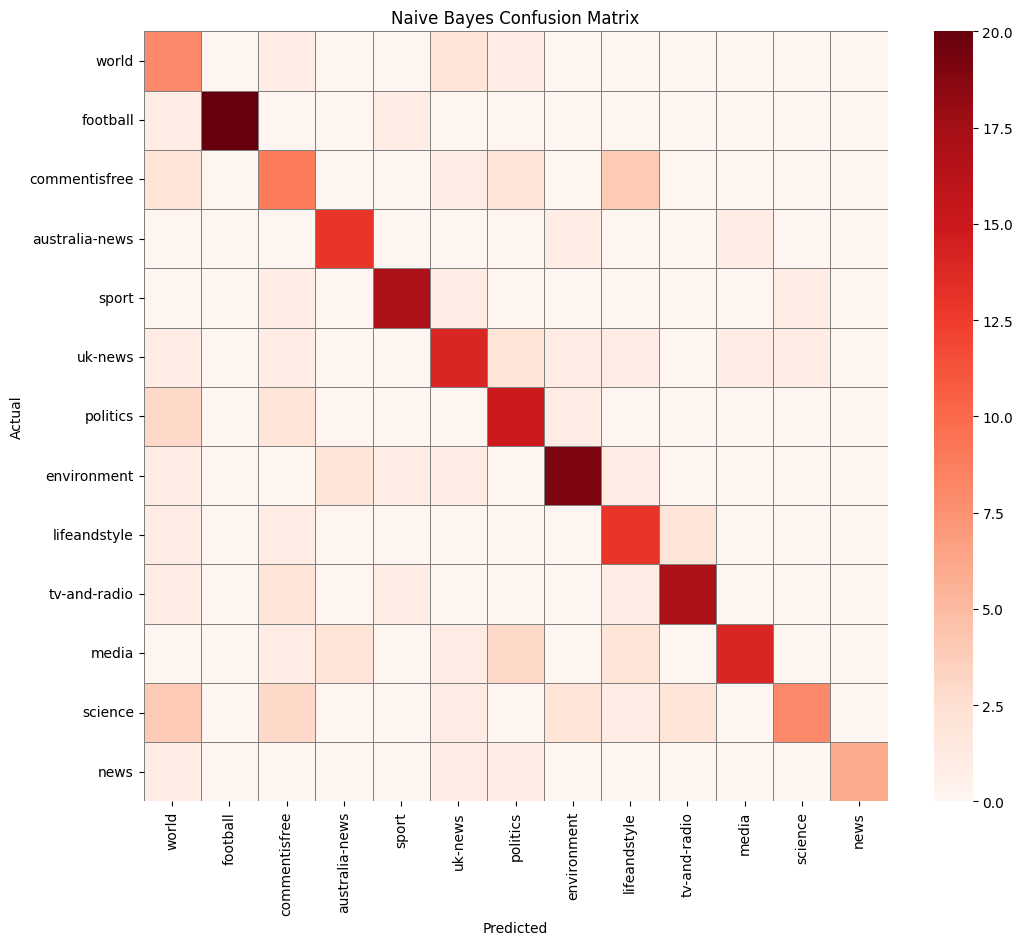

In [ ]:
lrcm_df = pd.read_csv("naive_bayes_confusion_matrix.csv", index_col=0)

lrcm_df.index.name = 'Actual'
lrcm_df.columns.name = 'Predicted'

plt.figure(figsize=(12, 10))
sns.heatmap(lrcm_df, annot=False, cmap="Reds", linewidths=0.5, linecolor='gray')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


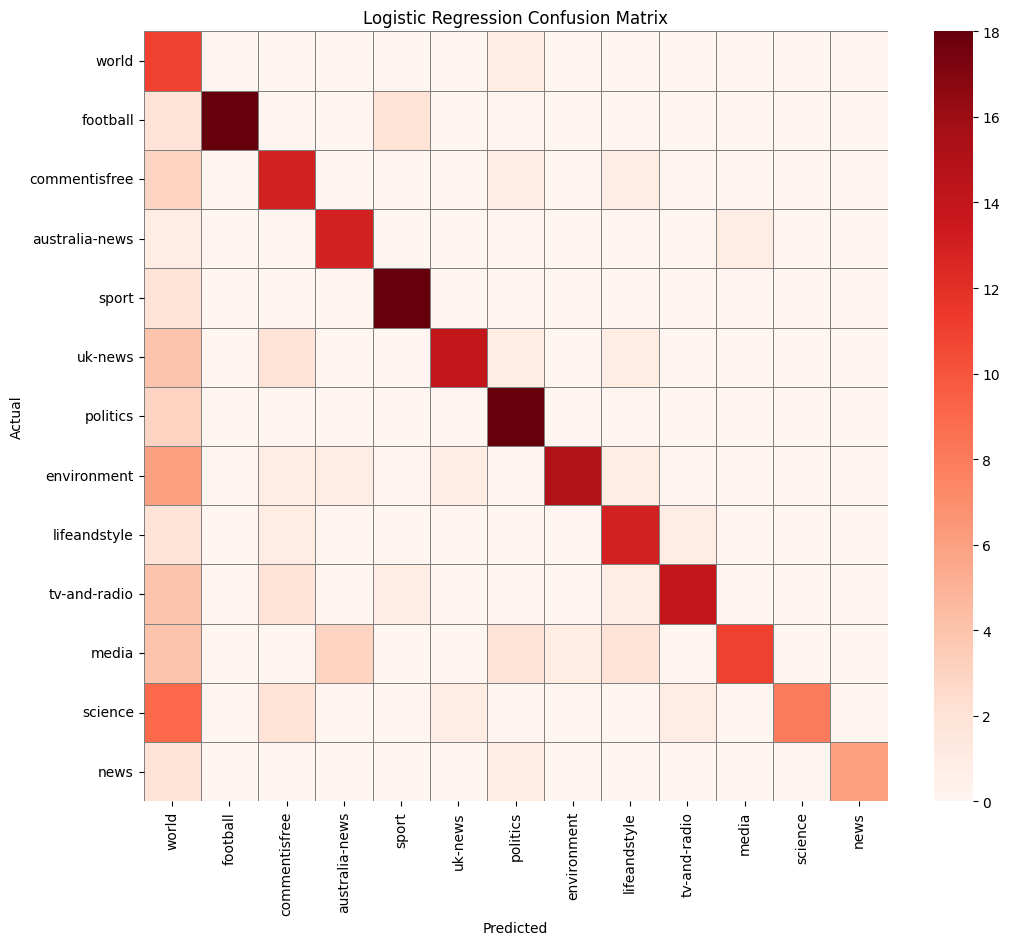

In [ ]:
lrcm_df = pd.read_csv("logistic_regression_confusion_matrix.csv", index_col=0)

lrcm_df.index.name = 'Actual'
lrcm_df.columns.name = 'Predicted'

plt.figure(figsize=(12, 10))
sns.heatmap(lrcm_df, annot=False, cmap="Reds", linewidths=0.5, linecolor='gray')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


